# Modeling CO2 Emissions through Gradient Descent

In [1]:
#1b9e77 
#d95f02
#7570b3
#e7298a
#e6ab02

## **Setup**

#### **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### **Loading Data**


In [3]:
df = pd.read_csv('annual_global_CO2_levels', 
                 delimiter = "\t", 
                 names = ["Year", "CO2 Level"], 
                 skiprows = 1)

#### **Graphing Data**

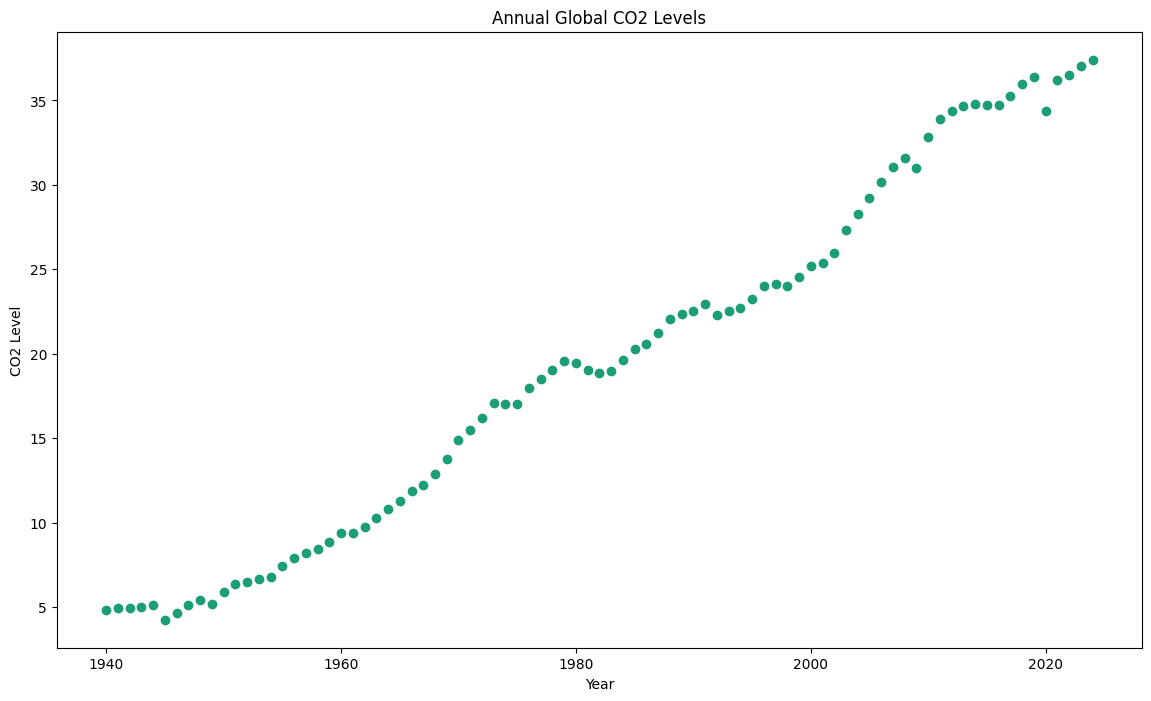

In [4]:
plt.figure(figsize = (14, 8))
plt.scatter(df['Year'], df['CO2 Level'], color = '#1b9e77')
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Annual Global CO2 Levels')
plt.show()

#### **Scaling Data**

Scaling is required here because the x-values are in thousands and the y-values are in single or double digits.

In [5]:
x_values = df['Year'].values.astype(np.float32)
x_values = (x_values - x_values.min()) / (x_values.max() - x_values.min())

y_values = df['CO2 Level'].values.astype(np.float32)
y_values = (y_values - y_values.min()) / (y_values.max() - y_values.min())

#### **Splitting Data**

Splitting the data into training, validation, and testing sets.

In [6]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x_values, y_values, test_size = 0.2, random_state = 13)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.2, random_state = 13)

## **Modeling**

### **Linear Model**

Let's start with a linear model, as a linear shape is pretty evident in the graph. I'll use the following equation for the linear model:

$$y = mx + b$$

In [7]:
def linearModel(m: float, b: float, set:np.ndarray) -> float:
    return m * set + b

I'll set my initial values based on a reasonable guess, that can capture the linear shape of the data.

In [8]:
m = 1.0
b = 0.0

Let's graph the initial linear model to see how it fits.

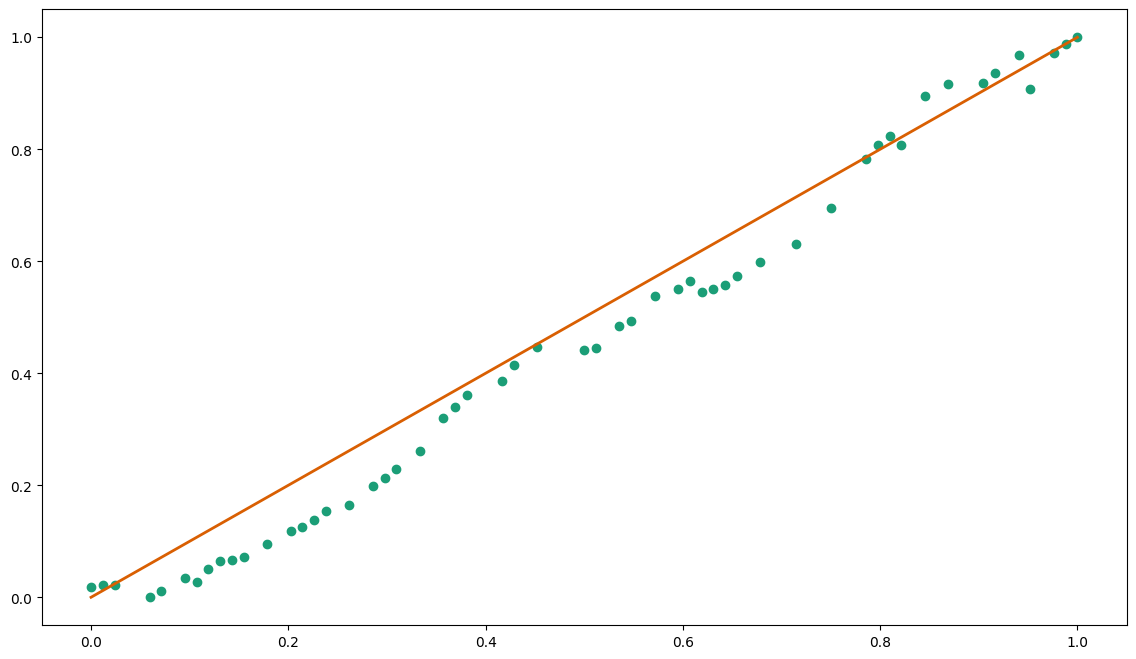

In [9]:
x = np.linspace(0, 1, 100)
y = linearModel(m, b, x)

plt.figure(figsize = (14, 8))
plt.scatter(x_train, y_train, color = '#1b9e77')
plt.plot(x, y, linewidth = 2, color = '#d95f02')

plt.show()

That doesn't look too bad. Now lets perform gradient descent to find the optimal values for m and b. I'll use the Mean Absolute Error (MAE) as the loss function.

$$ E = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

In [10]:
def linearError(m: float, b: float, x:np.ndarray, y:np.ndarray) -> float:
    return np.mean((np.abs(linearModel(m, b, x) - y)))

Before I start coding the gradient descent, I'll need to calculate the gradients for the parameters $m$ and $b$.

$$ E_a = \frac{1}{n} \sum_{i=1}^{n} \text{sign}(\hat{y}_i - y_i) \cdot x_i $$ 

$$ E_b = \frac{1}{n} \sum_{i=1}^{n} \text{sign}(\hat{y}_i - y_i) $$

Now that we have our gradients, I'll set up hyperparameters for the gradient descent algorithm.

In [11]:
# Hyperparameters
learning_rate = 1E-3
epochs = 1000

I changed these hyperparameters a few times to get the best results. I found that a learning rate of $1 \times 10^-3$ and 1000 iterations worked well.

In [12]:
# Epoch data 
training_loss = []
validation_loss = []

# Training loop
for epoch in range(epochs):
    y_pred_train = m * x_train + b

    dm = np.mean(np.sign(y_pred_train - y_train) * x_train)
    db = np.mean(np.sign(y_pred_train - y_train))

    m = m - learning_rate * dm
    b = b - learning_rate * db

    y_pred_train = m * x_train + b
    loss = np.mean(np.abs(y_pred_train - y_train))
    training_loss.append(loss)

    y_pred_val = m * x_val + b
    val_loss = np.mean(np.abs(y_pred_val - y_val))
    validation_loss.append(val_loss)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: loss = {loss}')

# Print final loss and parameters
print("---------------------------------------")
print(f'Final Training Loss: {linearError(m, b, x_train, y_train)}')
print(f'Final Validation Loss: {linearError(m, b, x_val, y_val)}')
print(f'm: {m}, b: {b}')

Epoch 0: loss = 0.04978134110569954
Epoch 100: loss = 0.03656311333179474
Epoch 200: loss = 0.03437954932451248
Epoch 300: loss = 0.03278498724102974
Epoch 400: loss = 0.031533028930425644
Epoch 500: loss = 0.030946360900998116
Epoch 600: loss = 0.030433425679802895
Epoch 700: loss = 0.029996206983923912
Epoch 800: loss = 0.02955915778875351
Epoch 900: loss = 0.02917579747736454
---------------------------------------
Final Training Loss: 0.028971537947654724
Final Validation Loss: 0.040971990674734116
m: 1.0556466005482283, b: -0.07529629651829721


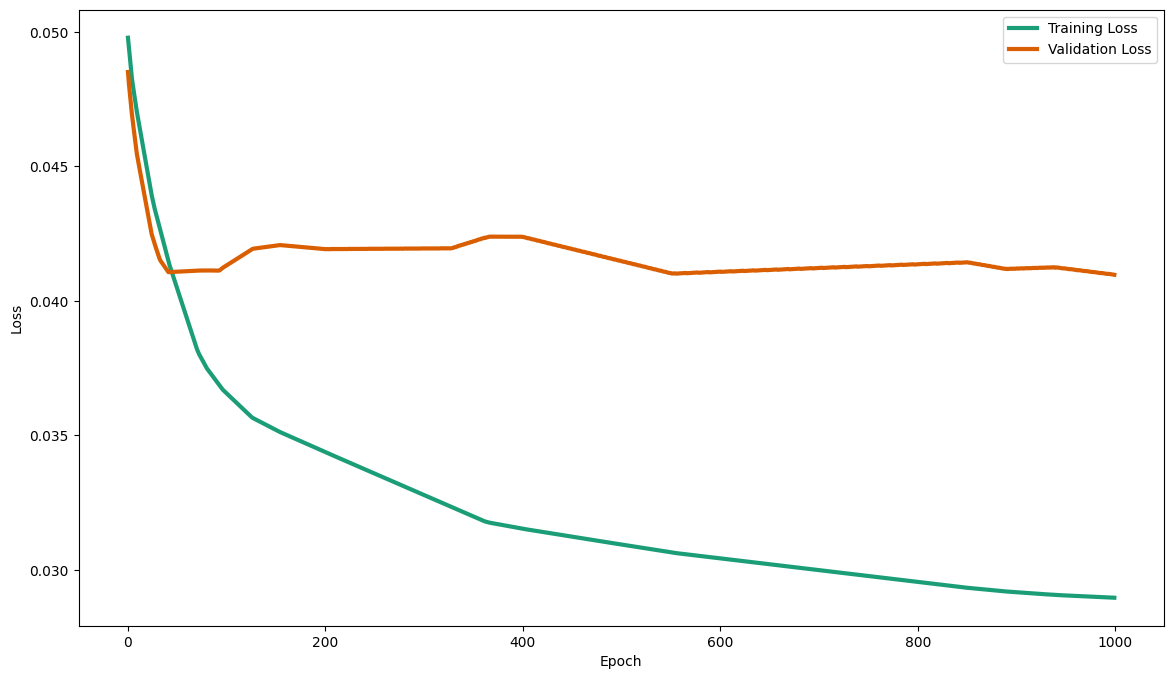

In [13]:
plt.figure(figsize = (14, 8))
plt.plot(training_loss, label='Training Loss', linewidth = 3, color = '#1b9e77')
plt.plot(validation_loss, label='Validation Loss', linewidth = 3, color = '#d95f02')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

/var/folders/4z/1s07dvg55sq1ks6sghlxv2rh0000gn/T/ipykernel_67224/1956571969.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', linewidth = 2, color = '#d95f02')


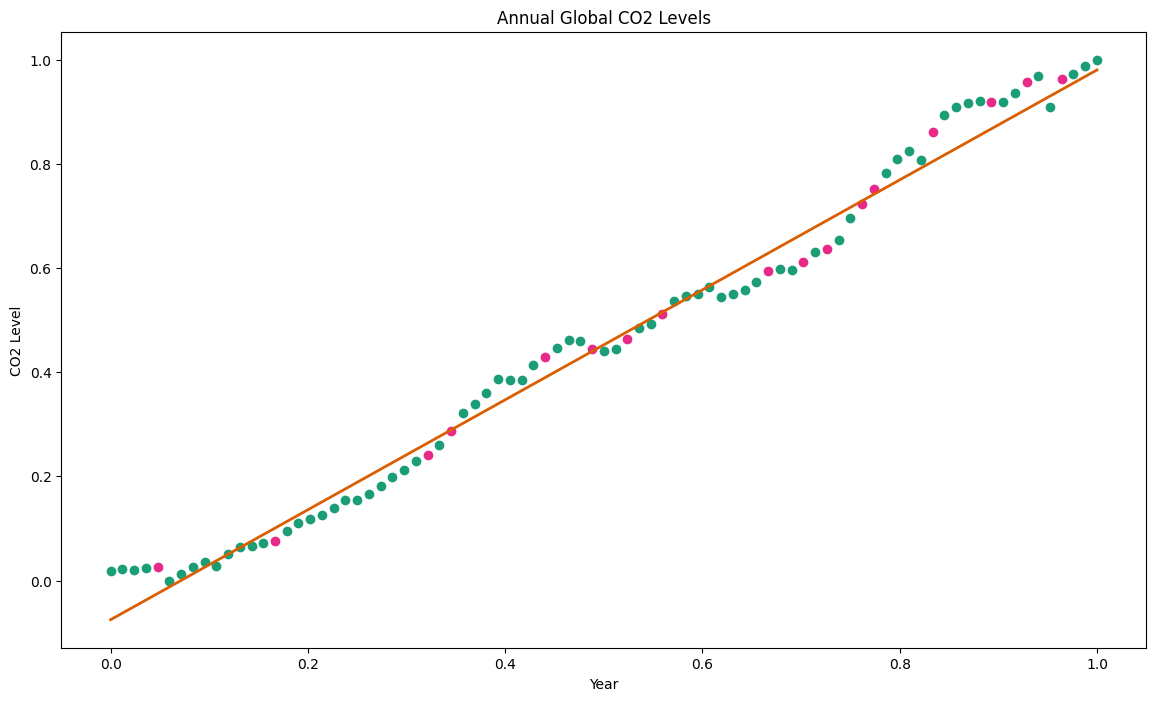

In [14]:
x = np.linspace(0, 1, 100)
y = linearModel(m, b, x)

plt.figure(figsize = (14, 8))
plt.plot(x, y, 'r', linewidth = 2, color = '#d95f02')
plt.scatter(x_train_val, y_train_val, color = '#1b9e77')
plt.scatter(x_test, y_test, color = '#e7298a') 
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Annual Global CO2 Levels')
plt.show()

### **Exponential Model**